# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib as plt

%matplotlib inline

In [5]:
sns.set_theme(
    style = 'whitegrid'
    
    



)

In [6]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [68]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | First time flying with Briti...
1,✅ Trip Verified | The latest affront. Stood i...
2,Not Verified | Booked a flight return flight ...
3,✅ Trip Verified | I tried to check in on line...
4,✅ Trip Verified | A catalogue of failures. We...


In [69]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [70]:
df

,reviews
0,✅ Trip Verified | First time flying with Briti...
1,✅ Trip Verified | The latest affront. Stood i...
2,Not Verified | Booked a flight return flight ...
3,✅ Trip Verified | I tried to check in on line...
4,✅ Trip Verified | A catalogue of failures. We...
...,...
995,✅ Trip Verified | Los Angeles to London Heath...
996,✅ Trip Verified | London Heathrow to Mahon. B...
997,✅ Trip Verified | Dubai to London Heathrow. L...
998,✅ Trip Verified | London Heathrow to Singapor...


In [71]:
df['reviews'] = df['reviews'].str.replace('✅ ', '')    

In [72]:
df

,reviews
0,Trip Verified | First time flying with British...
1,Trip Verified | The latest affront. Stood in ...
2,Not Verified | Booked a flight return flight ...
3,Trip Verified | I tried to check in on line a...
4,Trip Verified | A catalogue of failures. We f...
...,...
995,Trip Verified | Los Angeles to London Heathro...
996,Trip Verified | London Heathrow to Mahon. Boo...
997,Trip Verified | Dubai to London Heathrow. Lov...
998,Trip Verified | London Heathrow to Singapore ...


In [73]:
df['reviews'] =df['reviews']

In [74]:
def getverify(x):
        status = x.split('|')[0]
        comments=  x.split('|')[-1]
        return status, comments
    

In [76]:
df['comments'] = df['reviews'].apply(lambda x: getverify(x)[1])
df['reviews'] = df['reviews'].apply(lambda x: getverify(x)[0])


In [77]:
df['reviews'].value_counts()

Trip Verified      822
Not Verified       176
❎ Not Verified       2
Name: reviews, dtype: int64

In [78]:
df['reviews'] = df['reviews'].str.replace('❎ ', '')   

In [79]:
df['reviews'].value_counts()

Trip Verified     822
Not Verified      178
Name: reviews, dtype: int64

In [80]:
df = df.astype({
    'reviews': 'category'
})

In [81]:
df.dtypes

reviews     category
comments      object
dtype: object

In [82]:
df['status'] = df.reviews.cat.codes

In [83]:
df

,reviews,comments,status
0,Trip Verified,First time flying with British Airways and fi...,1
1,Trip Verified,The latest affront. Stood in first class lin...,1
2,Not Verified,Booked a flight return flight between London...,0
3,Trip Verified,I tried to check in on line and was informed...,1
4,Trip Verified,A catalogue of failures. We flew from Belfas...,1
...,...,...,...
995,Trip Verified,Los Angeles to London Heathrow. Desperately ...,1
996,Trip Verified,London Heathrow to Mahon. Booked 9 months ag...,1
997,Trip Verified,Dubai to London Heathrow. Lovely flight and ...,1
998,Trip Verified,London Heathrow to Singapore on 28 May 2018....,1


<Axes: xlabel='reviews', ylabel='count'>

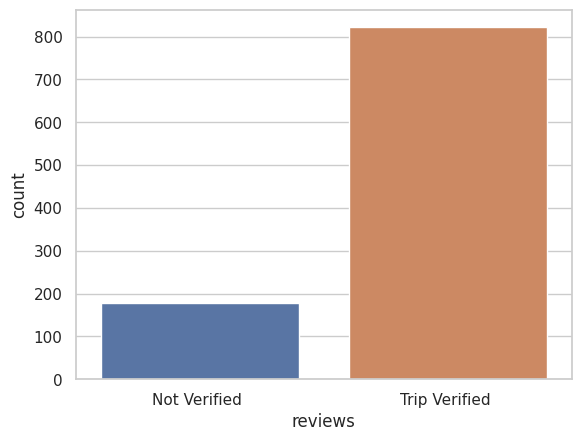

In [84]:
sns.countplot(
    data =df,
     x ='reviews'
)